<a href="https://colab.research.google.com/github/sumaia42/Power-Grid-Stability-Prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [166]:
df = pd.read_csv('/content/smart_grid_stability_augmented.csv')

In [167]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0.023892,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,-0.025803,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,-0.031810,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0.037789,unstable


In [168]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [169]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [170]:
map = {'unstable': 0, 'stable': 1}

In [171]:
df['stabf'] = df['stabf'].replace(map)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


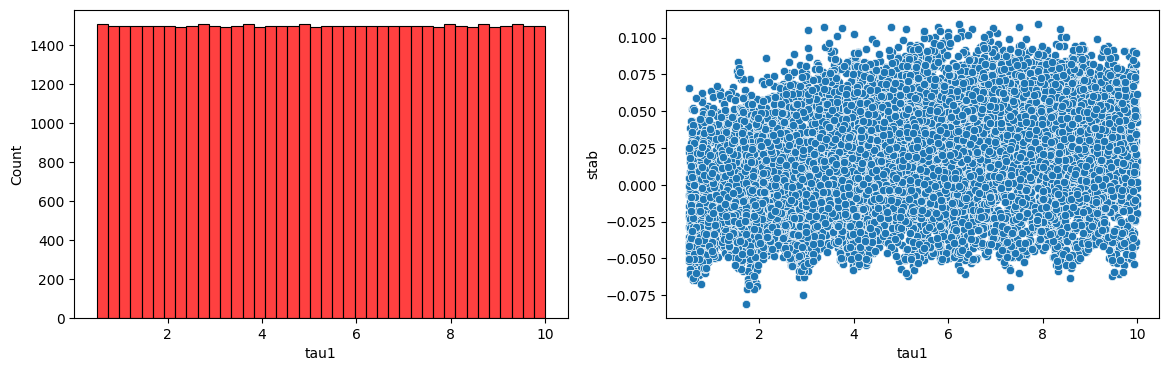

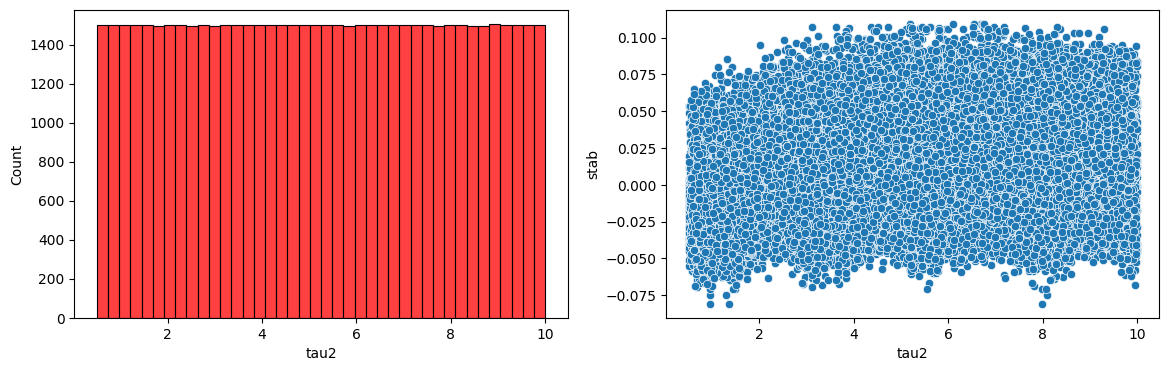

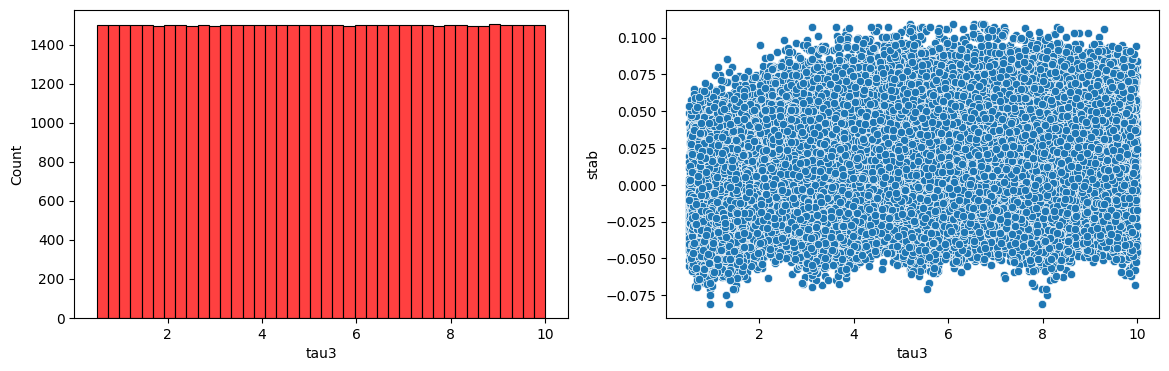

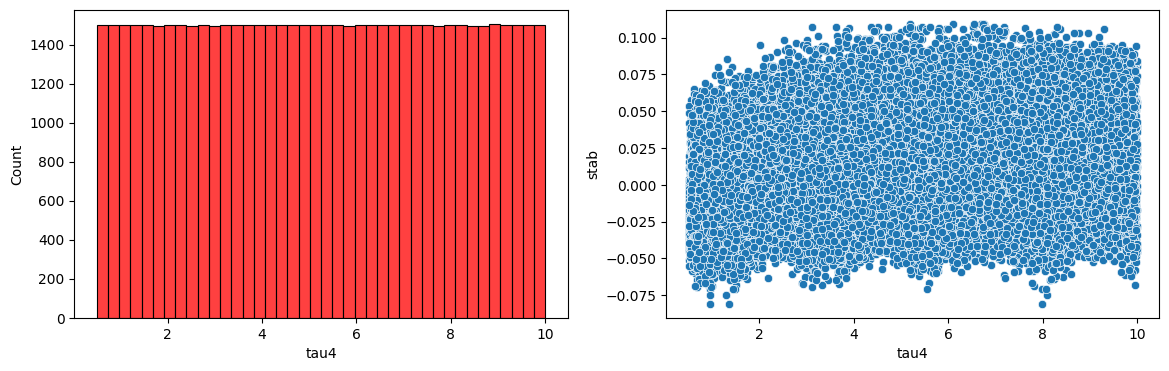

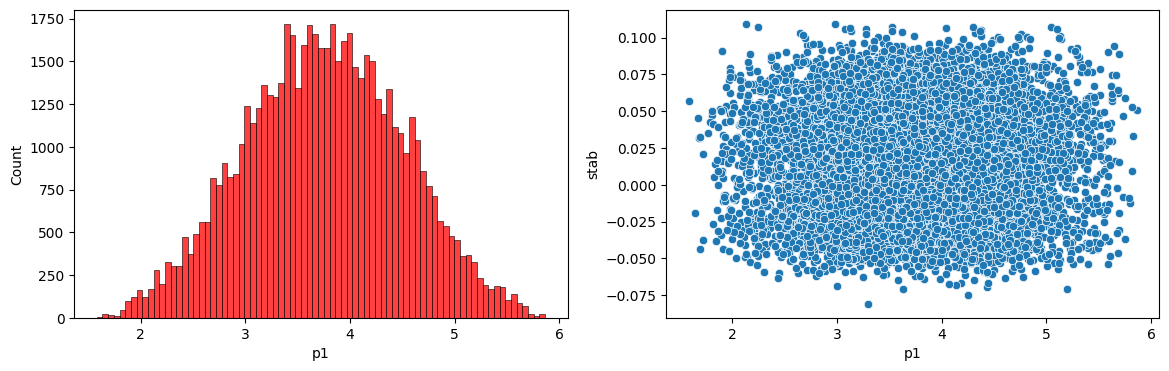

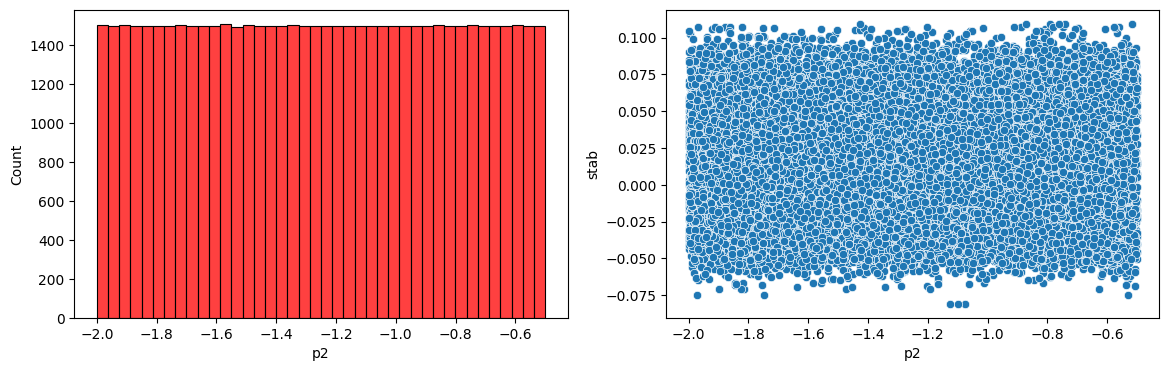

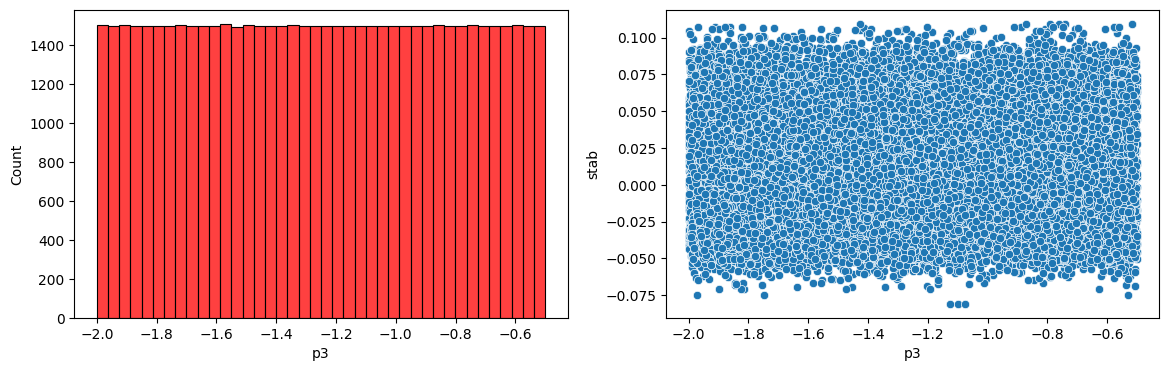

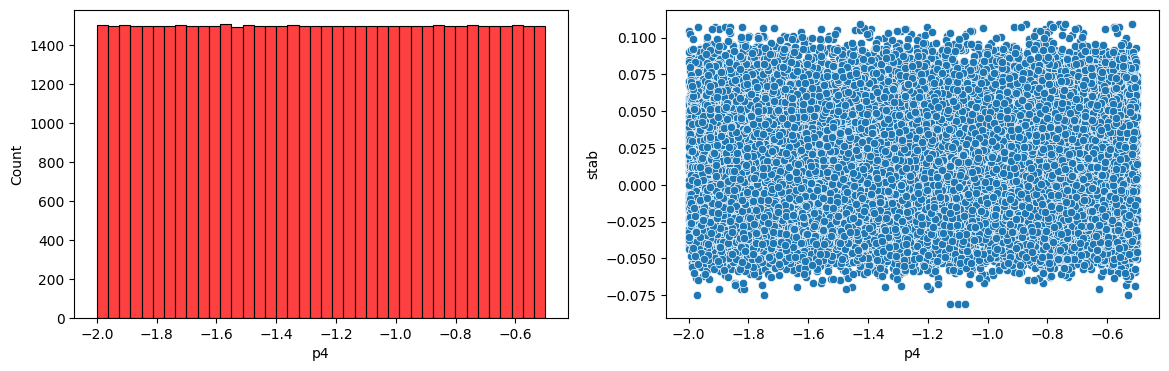

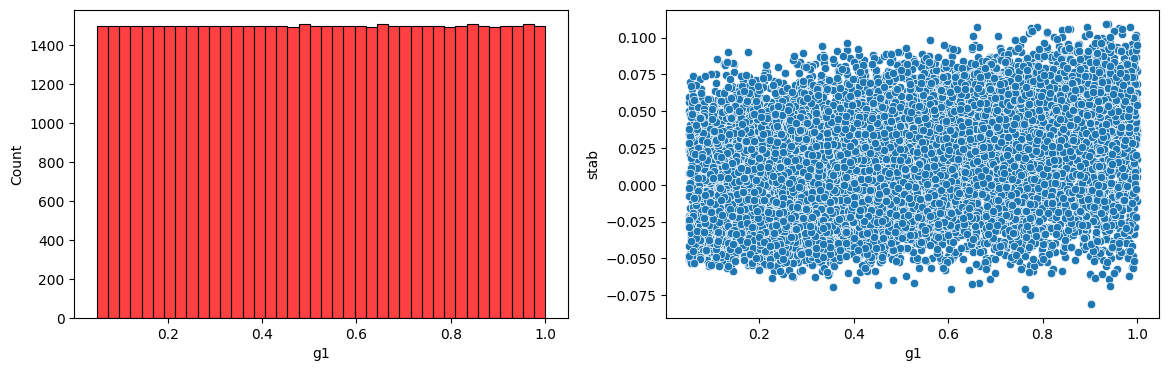

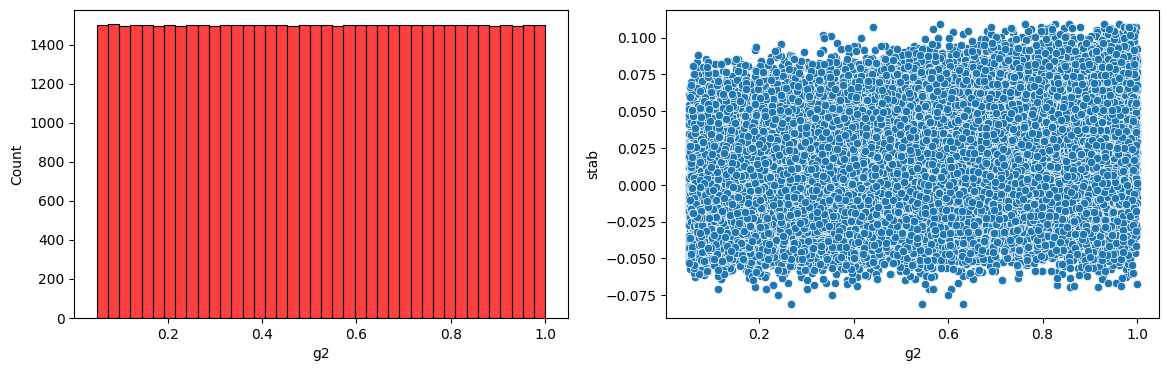

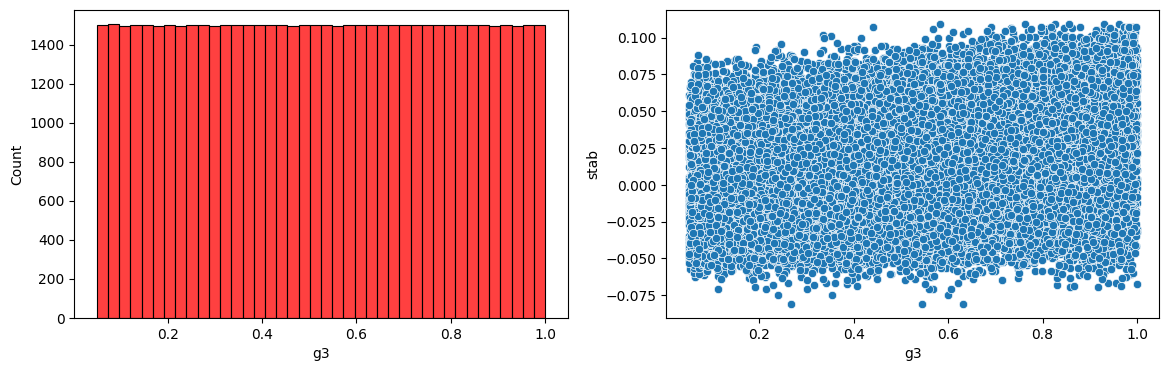

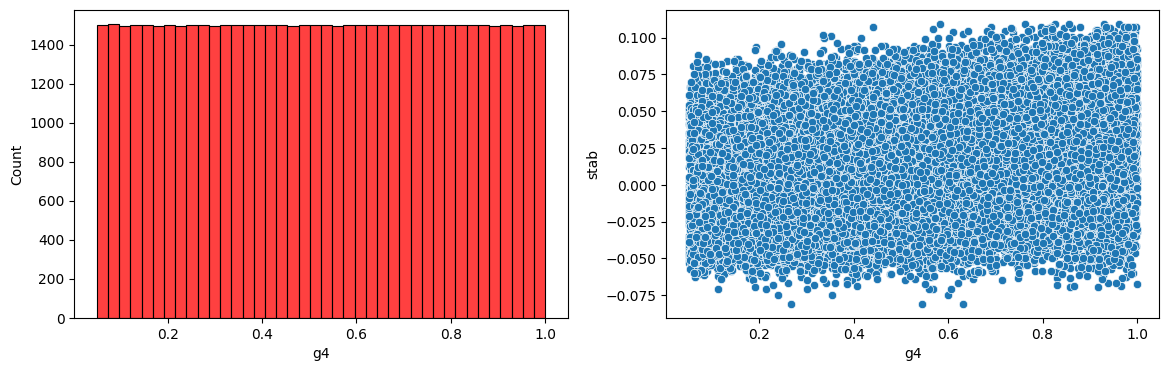

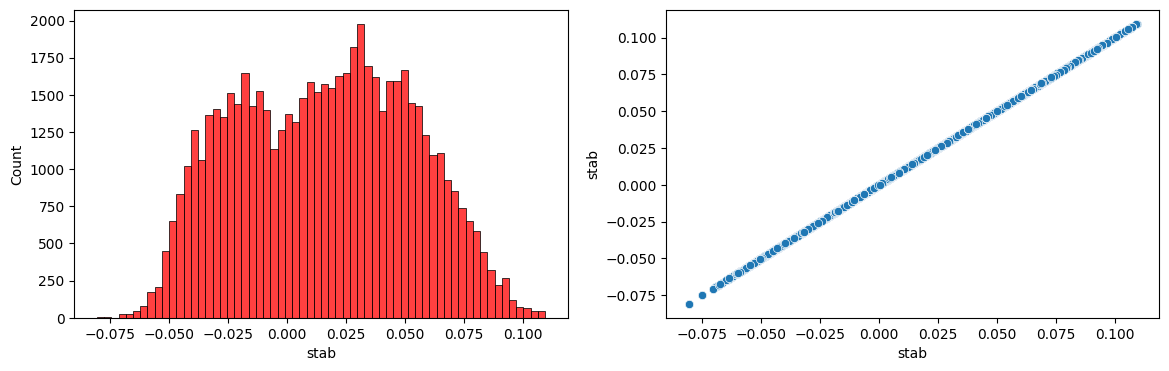

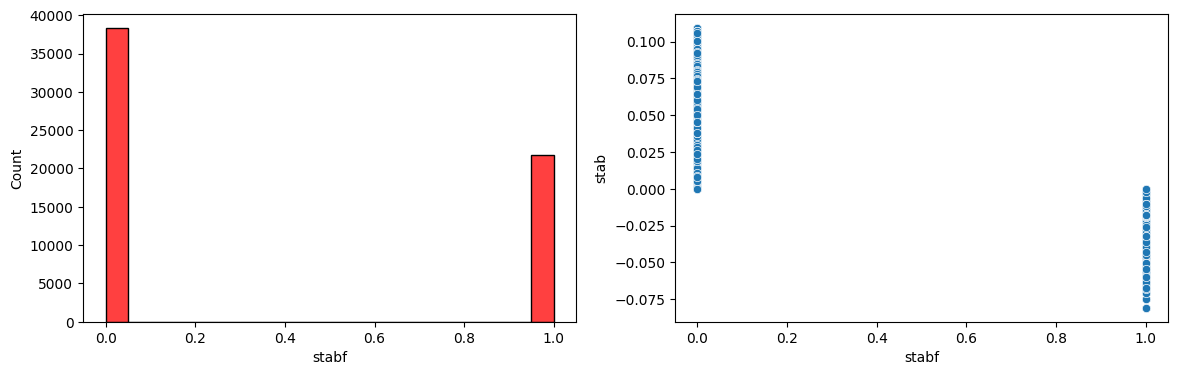

In [172]:
for column in df:
    plot_fig, plot_axes = plt.subplots(1, 2, figsize = (14, 4))
    chart_1 = sns.histplot(x=df[column], ax = plot_axes[0], color='r')

    chart_2 = sns.scatterplot(x = column, y = 'stab', data = df, ax = plot_axes[1])

    plt.show()
del plot_fig, plot_axes

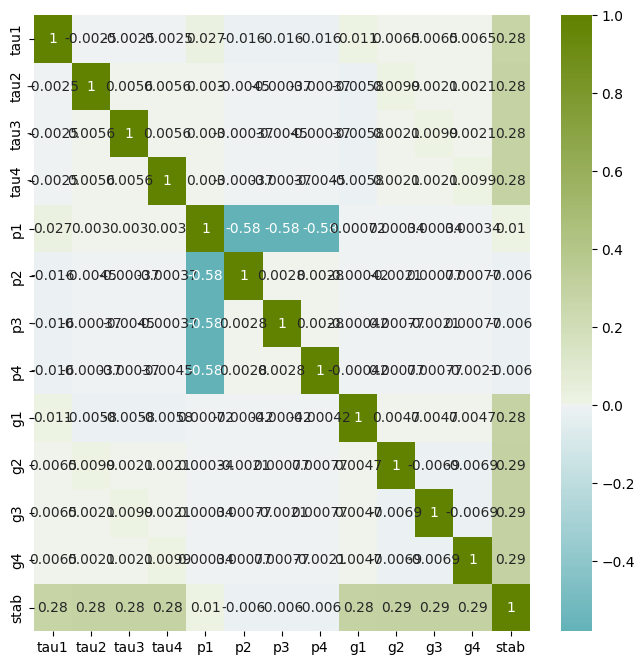

In [173]:
corr_data = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))
color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
sns.heatmap(corr_data.drop(columns=['stabf'], index=['stabf']), cmap=color_map, annot=True, ax = ax, center=0.00000)
plt.show()
del corr_data

In [174]:
df.dropna()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0.023892,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,-0.025803,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,-0.031810,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0.037789,0


In [175]:
y = df.iloc[:, -1]
X = df.drop('stabf', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 156)

In [176]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
pca = PCA(n_components=2)
x2d = pca.fit_transform(X_imputed)
x2d_df = pd.DataFrame(x2d)

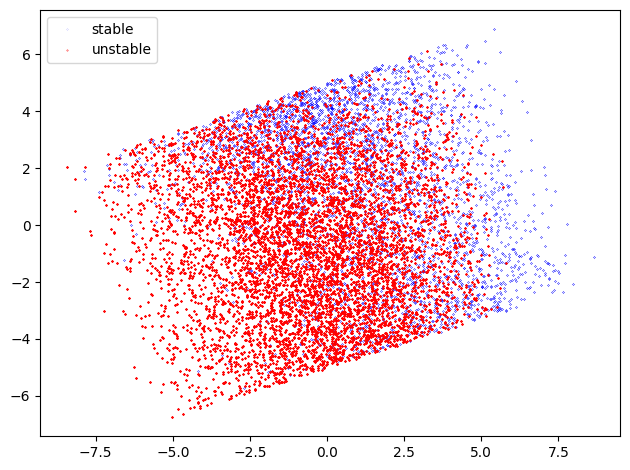

In [177]:
plt.plot(x2d_df[0][y==1], x2d_df[1][y==1], 'b.', ms=0.16, label='stable')
plt.plot(x2d_df[0][y==0], x2d_df[1][y==0], 'r.', ms=0.6, label='unstable')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [178]:
X_train.shape, y_train.shape

((48000, 13), (48000,))

In [179]:
X_test.shape, y_test.shape

((6000, 13), (6000,))

XGBRegressor

In [180]:
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [181]:

test_predictions =xgb_model.predict(X_test)
train_predictions = xgb_model.predict(X_train)

In [182]:
xgb_model.score(X_train,y_train)

0.999999243856828

In [183]:
xgb_model.score(X_test,y_test)


0.9999970943992371

SVM

In [184]:
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)

SVC(kernel='linear')

In [185]:
test_predictions = sv.predict(X_test)
train_predictions = sv.predict(X_train)

In [186]:
sv.score(X_train,y_train)

0.9841875

In [187]:
sv.score(X_test,y_test)

0.9851666666666666

In [188]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3801
           1       0.98      0.97      0.98      2199

    accuracy                           0.99      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000



LogisticRegression

In [189]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [190]:
test_predictions = log_reg.predict(X_test)
train_predictions = log_reg.predict(X_train)

In [191]:
log_reg.score(X_train,y_train)

0.9618125

In [192]:
log_reg.score(X_test,y_test)

0.9608333333333333

In [193]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3801
           1       0.95      0.94      0.95      2199

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



KNN

In [194]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [195]:
test_predictions = knn.predict(X_test)
train_predictions = knn.predict(X_train)

In [196]:
knn.score(X_train,y_train)

0.8938958333333333

In [197]:
knn.score(X_test,y_test)

0.8225

In [198]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3801
           1       0.78      0.72      0.75      2199

    accuracy                           0.82      6000
   macro avg       0.81      0.80      0.81      6000
weighted avg       0.82      0.82      0.82      6000



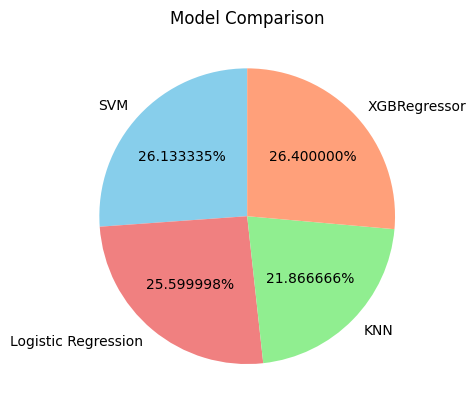

In [199]:
model_names = ['SVM', 'Logistic Regression', 'KNN', 'XGBRegressor']
accuracy_values = [0.98, 0.96, 0.82, 0.99]
plt.pie(accuracy_values, labels=model_names, autopct='%1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Model Comparison')
plt.show()

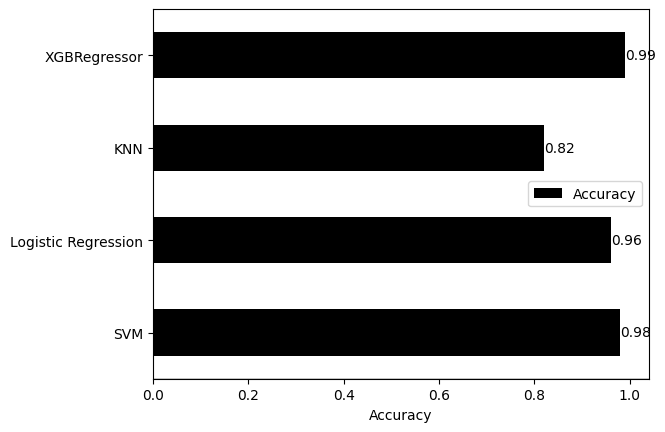

In [200]:
model_names = ['SVM', 'Logistic Regression', 'KNN', 'XGBRegressor']
accuracy_values = [0.98, 0.96, 0.82, 0.99]
indices = np.arange(len(model_names))
bar_width = 0.5
bars = plt.barh(indices, accuracy_values, height=bar_width, color='black', label='Accuracy')
plt.xlabel('Accuracy')
plt.yticks(indices, model_names)
plt.legend()
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{accuracy:.2f}', color='black', ha='left', va='center')
plt.ylim(-0.5, len(model_names) - 0.5)
plt.axhline(y=-0.5, color='black', linewidth=1)
plt.show()